# Start of PCA

In [2]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/actMath_11.csv')



In [3]:
# Dropping ID and extra labels
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'proficient_score'])


In [4]:
one_hot_encoded_df2.head()

,is_proficient,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [5]:
one_hot_encoded_df2.columns.tolist()

['is_proficient',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_BIOLOGY ADV',
 'course_Bak & Pstr A',
 'course_BandConcer.5',
 'course_BandConcer1C',
 'course_BandMar

## PCA

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['is_proficient']))

In [7]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  #threshold = 80%
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 108
Cumulative explained variance: 0.803183671153641


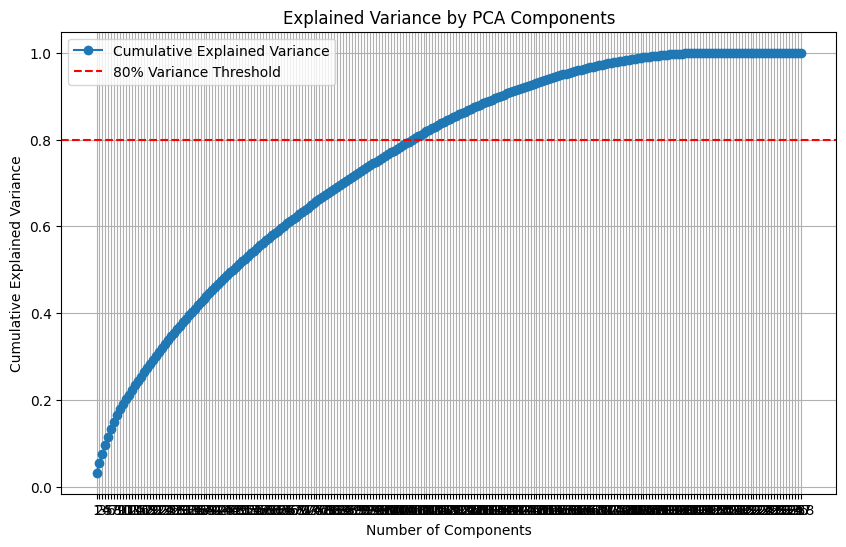

In [8]:
#messy visual for explained variance and PCA components
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()



In [9]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [10]:
first_108_pcs_df = X_pca_df.iloc[:, :108].copy()

In [11]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
1,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
2,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
3,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
4,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.276821,-0.777051,0.890722,-0.707012,1.229907,-0.562255,-1.334325,-3.006055,-1.929716,-0.163924,...,-0.000258,0.000164,0.000063,0.000306,0.001119,-0.001966,0.001897,0.000336,-0.001493,0.004474
3833,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3834,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3835,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569


#### Most important features in principal components

In [12]:

components = pca.components_[:108]  # First 108 principal components

feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['is_proficient']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HEALTH 9-12', 'course_DRIVERS ED', 'course_D&TSafetyEd', 'school_High School B', 'course_Health 9-12']
Top features for PC2: ['course_Physical Sci', 'course_English Gr10', 'course_Algebra I B', 'course_Eng Gr10 Adv', 'course_ChemistryAdv']
Top features for PC3: ['course_Ess II:USHis', 'course_Ess: Phy Sci', 'course_Eng Ess 10', 'course_Alg Esntls B', 'course_RdIntrv7-12']
Top features for PC4: ['school_High School B', 'course_BullBogAdv', 'course_Panther Adv', 'school_High School A', 'course_HISTUS1877AC']
Top features for PC5: ['course_EnglGr10ACCE', 'course_PhySciACCESS', 'course_HealthACCESS', 'course_TranSer 11', 'course_Ess: E & SS']
Top features for PC6: ['course_Ess: E & SS', 'course_TranSer 11', 'course_Eng Ess 11', 'course_EssIII:USHis', 'course_Geo Ess']
Top features for PC7: ['course_EnglGr10ACCE', 'course_PhySciACCESS', 'course_HealthACCESS', 'course_USHisIG10ACC', 'course_AlgII/TrigAC']
Top features for PC8: ['school_High School D', 'course_E

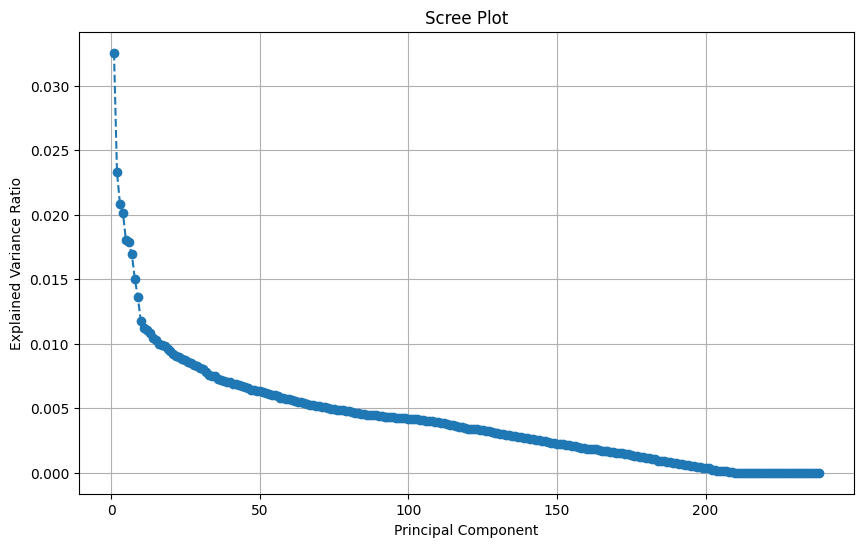

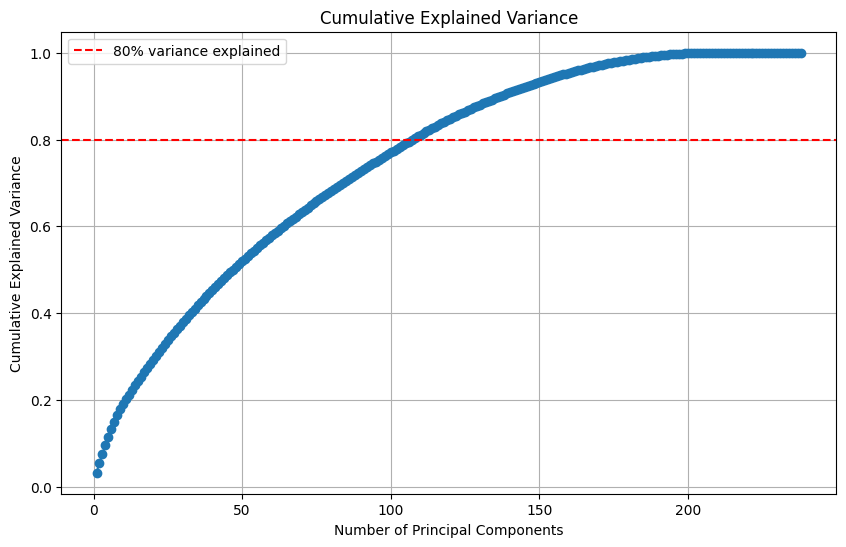

In [13]:

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Start of Modeling

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['is_proficient']  # Labels


In [16]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## XG boost binary

Cross-Validated Accuracy: 0.81
Accuracy: 0.80
Macro F1 Score: 0.79
Confusion Matrix:
[[401  39]
 [111 217]]


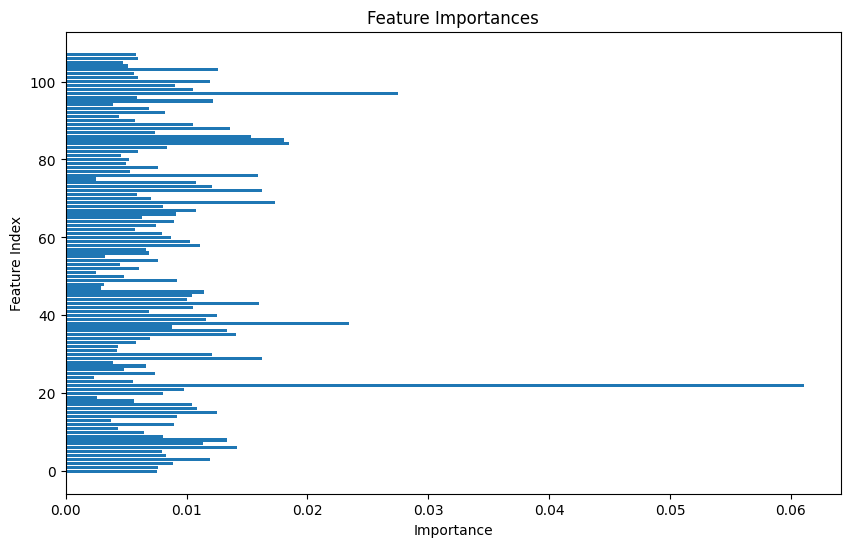

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score


# Initialize the XGBClassifier with additional regularization and reduced complexity
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()
print(f"Cross-Validated Accuracy: {mean_cv_accuracy:.2f}")

# train model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plotting feature importance for interpretability
plt.figure(figsize=(10, 6))
plt.barh(xgb_model.feature_importances_.argsort(), xgb_model.feature_importances_)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.show()


**Metrics:**
Cross-Validated Accuracy: 0.81

Accuracy: 0.80

Macro F1 Score: 0.79

Confusion Matrix:

[[401  39]

 [111 217]]

# calculating precision, tpr, tnr, accuracy, macro-f1

In [20]:
# Extract values from the confusion matrix
n1, n2 = conf_matrix[0]  # TN, FP
n3, n4 = conf_matrix[1]  # FN, TP

# Calculate metrics
precision = n4 / (n4 + n2) if (n4 + n2) != 0 else 0  # Avoid division by zero
tpr = n4 / (n4 + n3) if (n4 + n3) != 0 else 0        # Sensitivity (Recall)
tnr = n1 / (n1 + n2) if (n1 + n2) != 0 else 0        # Specificity

print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (TPR/Sensitivity): {tpr:.4f}")
print(f"True Negative Rate (TNR/Specificity): {tnr:.4f}")

Precision: 0.8477
True Positive Rate (TPR/Sensitivity): 0.6616
True Negative Rate (TNR/Specificity): 0.9114


In [21]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")

Accuracy: 0.80
Macro F1 Score: 0.79


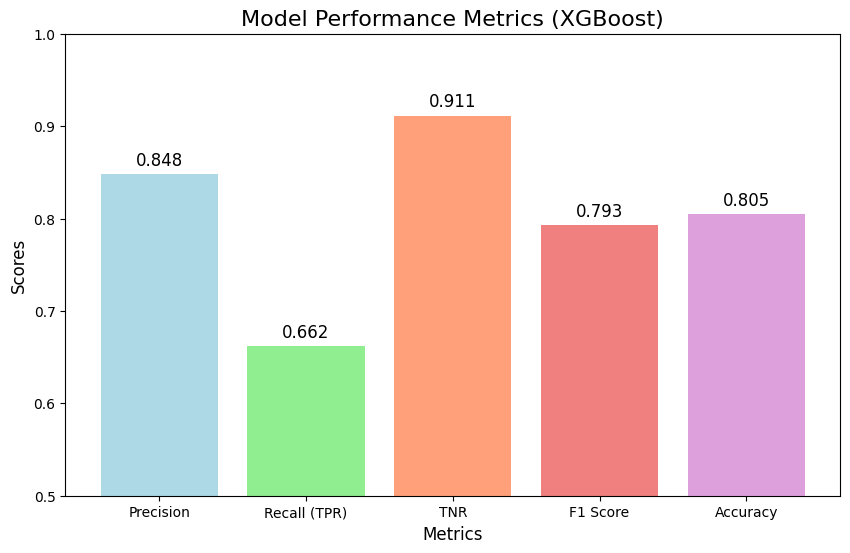

In [22]:


# Metrics and their corresponding values
metrics = ['Precision', 'Recall (TPR)', 'TNR', 'F1 Score', 'Accuracy']
values = [precision, tpr, tnr, macro_f1, accuracy]

colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightcoral', 'plum']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=colors)

# Adding title and labels
plt.title('Model Performance Metrics (XGBoost)', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)

# Setting y-axis limits from 0.5 to 1
plt.ylim(0.5, 1)

# Display the values on top of the bars
for i in range(len(values)):
    plt.text(i, values[i] + 0.01, f'{values[i]:.3f}', ha='center', fontsize=12)

plt.show()


### feature importances

In [25]:
#Extract Feature Importances
importance_dict = xgb_model_trained.get_score(importance_type='weight')  # or 'gain'
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

#Filter features with Importance > 20
filtered_importance_df = importance_df[importance_df['Importance'] > 20]

print(filtered_importance_df)


    Feature  Importance
1       PC2       152.0
3       PC4        48.0
94     PC95        45.0
4       PC5        45.0
77     PC78        43.0
2       PC3        40.0
48     PC49        37.0
0       PC1        37.0
8       PC9        36.0
61     PC62        35.0
14     PC15        32.0
105   PC106        32.0
13     PC14        31.0
19     PC20        30.0
32     PC33        30.0
7       PC8        29.0
5       PC6        29.0
26     PC27        26.0
73     PC74        26.0
47     PC48        26.0
28     PC29        26.0
100   PC101        25.0
16     PC17        25.0
81     PC82        24.0
54     PC55        24.0
31     PC32        23.0
9      PC10        23.0
96     PC97        22.0
67     PC68        22.0
79     PC80        22.0
23     PC24        22.0
52     PC53        21.0
102   PC103        21.0
